# Ford GoBike Dataset Analysis
## by Merna Ghaffar


Ford GoBike is a company that provides bicycle sharing system in the San Francisco, East Bay and San Jose areas. The Ford GoBike system currently has over 2,600 bicycles in 262 stations where uses can unlock bikes throughout the city and return them at any station within the same city. These users are either are either subscription based (yearly) or via passes (24hr or 3-day pass).

My main focus is to explore the dataset (which was downloaded online via the Ford GoBike website and the 2017 dataset was obtained), and look at trends that could give us more information about the bike users and their behaviors.

I start off my importing the packages that are going to be used in the data analysis and load the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import datetime as dt

%matplotlib inline

In [2]:
#loading the data
df= pd.read_csv("2017-fordgobike-tripdata.csv")

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


The dataset has 519,700 data points with 15 columns, of which many are useless for our analysis, such as; start_station_id, start_station_name, end_station_id, end_station_name. The other columns are of interest to us but would need some manipulation in order to be able to be useful. This includes:

1. Change duration_sec column into minutes
2. Separate start_time and end_time columns into start/end weekdays and hourly columns
3. Use start/end_station_latitude and start/end_station_longitude to calculate distance travelled
4. Calculate and create age column by using member_birth_year column.
5. remove the unnecessary columns 

These manipulations would not only help tidy-up the dataset but also help tremendously with the explorational analysis.

Now after a quick look at the dataset, I noticed that the user_types are separated into two types: Customer vs Subcribers. It would be interesting to look at the behavioral differences between the two.

## Preliminary Wrangling
I'm going to start off by creating a clean version of the dataset for room for modification for my exploratory analysis and start some preliminary wrangling.

In [156]:
df_clean= df.copy()

### 1. Converting duration from seconds to minutes

In [157]:
#converting secs to min
df_clean.duration_sec = ((df_clean.duration_sec)/60)

In [158]:
df_clean.rename(index=str, columns={"duration_sec":"duration_min"}, inplace=True)

### 2.  Separate start_time, end_time columns into weekday and start_hour, end_hour columns 

In [159]:
#change the datatype of start_time and end_time to datatime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [160]:
#get hour column 
df_clean['start_hour']=df_clean['start_time'].dt.hour
df_clean['end_hour']=df_clean['end_time'].dt.hour

In [161]:
#get weekday column
df_clean['start_time_weekday']=df_clean['start_time'].dt.weekday_name
df_clean['end_time_weekday']=df_clean['end_time'].dt.weekday_name

### 3. Calculate distance travelled by using start/end_station_latitude and start/end_station_longitude 

In [162]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [163]:
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

### 4. Calculate age column by using birth_year and create age group

In [164]:
#calculating age
df_clean['age'] = 2018-df_clean['member_birth_year']

In [165]:
#creating age groups
df_clean['age_group'] = df_clean['age'].apply(lambda x: '18 -28' if 18<x<=28
                                                  else '28 - 38' if 28<x<=38
                                                  else '38 - 48' if 38<x<=48
                                                  else '48 - 58' if 48<x<=58
                                                  else '58 - 70' if 58<x<=70
                                                  else x)

### 5. Drop unnecessary columns

In [166]:
df_clean= df_clean.drop(['start_station_id', 'start_station_name', 'end_station_id','end_station_name','member_bith_year','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1)

ValueError: labels ['member_bith_year'] not contained in axis

In [ ]:
df_clean.head()

## Univariate Exploration

### Trend in duration of recorded trips

I start off by looking at the duration trends. Are users going for a short or longer rides?

Text(0.5,1,'Number of Trips by Duration')

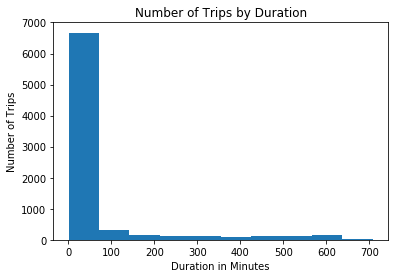

In [139]:

x= df_clean.duration_min.value_counts()
plt.hist(x, bins=10)
plt.ylabel("Number of Trips")
plt.xlabel("Duration in Minutes")
plt.title('Number of Trips by Duration')

It seems like most of the trips recorded have a duration between 0 and 100 mins, but that seems too broad so let's take a closer look.

Text(0.5,1,'Number of Trips by Duration')

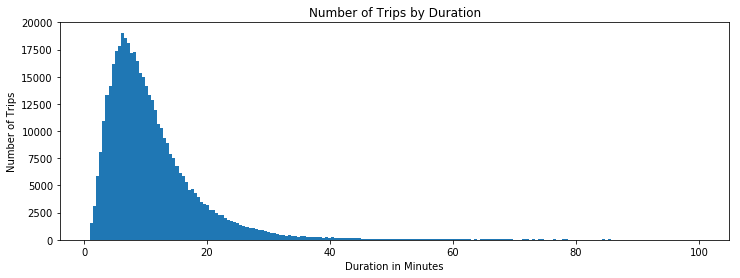

In [140]:
plt.figure(figsize=(12,4))
z= df_clean[df_clean['duration_min'] <=100]
z['duration_min'].plot(kind="hist", bins=200);
plt.ylabel("Number of Trips")
plt.xlabel("Duration in Minutes")
plt.title('Number of Trips by Duration')

Now it can be seen that a majority of trips taken are approximately 10 minutes long. Seems like most of the riders take shorter bike rides, with a mean of approximately 10 mins long.

Now, let's take a look at the distance travelled.

Text(0.5,1,'Distance(Km) Covered Per Trip')

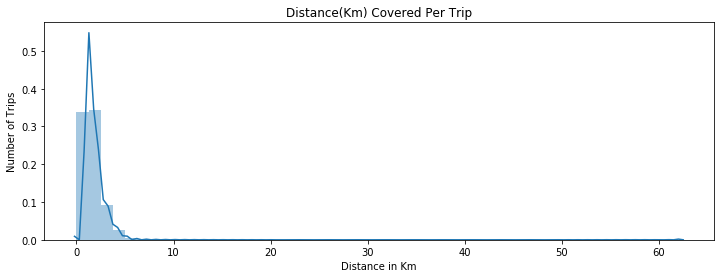

In [135]:
plt.figure(figsize=(12,4))
ax=sb.distplot(df_clean['distance_km'])
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Distance in Km')
ax.set_title('Distance(Km) Covered Per Trip')




This shows that most trips are approximatly 2 km in distance. This is consistent with the fact that the riders take shorter trips. 

Now this gives me a thought: short duration rides with a relative short distance would say that the user would have a particular distination. But let's dig more into this.

Lets look at behavior during the week.

Text(0.5,1,'Trips Taken per Weekday')

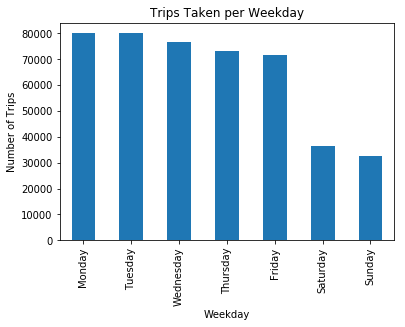

In [125]:
base_color= sb.color_palette()[0]

label=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
index = np.arange(len(label))
df_clean.start_time_weekday.value_counts().plot(kind="bar", color= base_color)
plt.xticks(index, label, fontsize=10, rotation=90)
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.title("Trips Taken per Weekday")


It seems that most trips are taken from Monday to Friday and the least is during the weekend. Monday-Friday are work days so it seems like the riders are mostly using their rides to go to or come back from work. This is quite interesting and is worth further looking into, but first let's get more information about the users.

There are two types of users: customers (of either 24hr or 3-day passes) and subscibers (yearly membership). How many of these rides were from customers vs subscribers?

Text(0.5,1,'Customer vs Subscriber GoBike Usage')

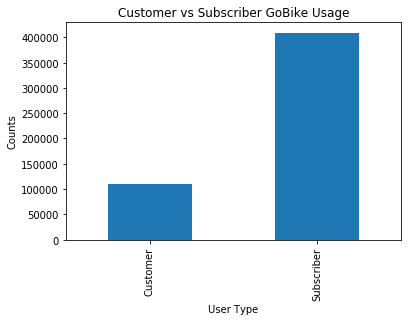

In [20]:
#plot customers vs subscribers usage
df_clean.user_type.groupby([df_clean.user_type]).count().plot(kind='bar', color= base_color);
plt.ylabel("Counts")
plt.xlabel("User Type")
plt.title('Customer vs Subscriber GoBike Usage')

Most of the rides taken were subscriber based, which could mean that the GoBike is repeated commute behavior.

Lets look more into the demographics of the members. Lets start with gender. Which gender is more predominant within the members? 

(-1.1054028416493829,
 1.1047797526821288,
 -1.1050353454803639,
 1.1051472488511478)

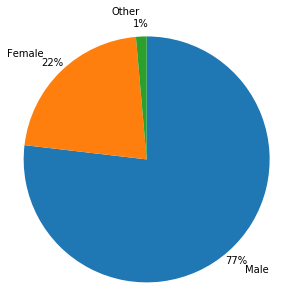

In [21]:
#plotting gender
plt.figure(figsize=(10,5))
sorted_counts=df_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels= sorted_counts.index, startangle=90, counterclock=False, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2);
plt.axis('Square')



77% of members are male, while 22% are females. 
Lets look at the age groups.

Which age group is more predominant within members?

Text(0.5,0,'Age')

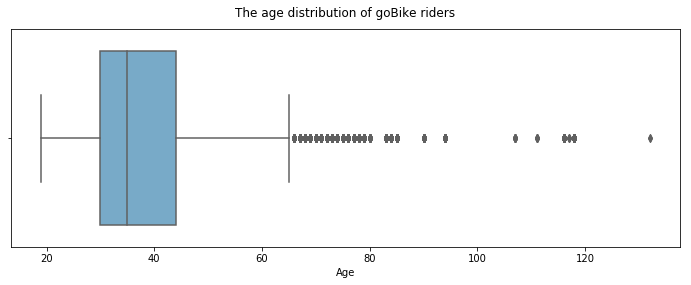

In [23]:
#looking at age
plt.figure(figsize=(12,4))
sb.boxplot(x= 'age', data=df_clean, palette='Blues', orient='h')
plt.title("The age distribution of goBike riders",y=1.03)
plt.xlabel("Age")


We can see here that most ages lies between 20-70 and anything above can be considered outliers. Lets limit our age group to under 70.

In [148]:
df_clean = df_clean[df_clean['age']<=70]

Text(0.5,0,'Age')

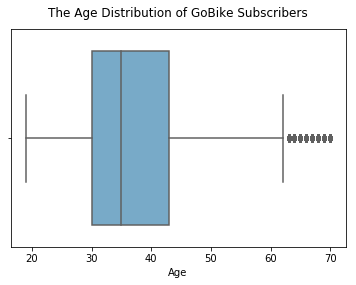

In [151]:
plt.figure(figsize=(6,4))
sb.boxplot(x= 'age', data=df_clean, palette='Blues', orient='h')
plt.title("The Age Distribution of GoBike Subscribers",y=1.03)
plt.xlabel("Age")

## Bivariate Exploration

Lets dig deeper into our search. What are the differences between customers and subscriber riders?

Lets start with trip durations. Do members take longer duration bike rides?

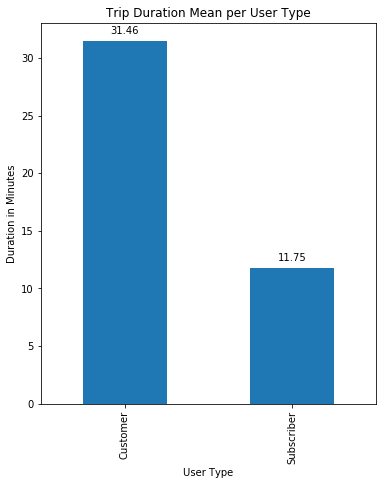

In [146]:
#looking at duration of customers vs subscribers
base_color = sb.color_palette()[0]

ax= df_clean.groupby('user_type')['duration_min'].mean().plot(kind='bar',figsize=(6,7), color=base_color)
plt.title('Trip Duration Mean per User Type')
plt.ylabel('Duration in Minutes')
plt.xlabel('User Type')

for p in ax.patches: 
        ax.annotate((np.round(p.get_height(),decimals=2)), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

It shows here that subscribers have a mean duration that is approximately four times less than customer. Perhaps customers travel a longer distance?


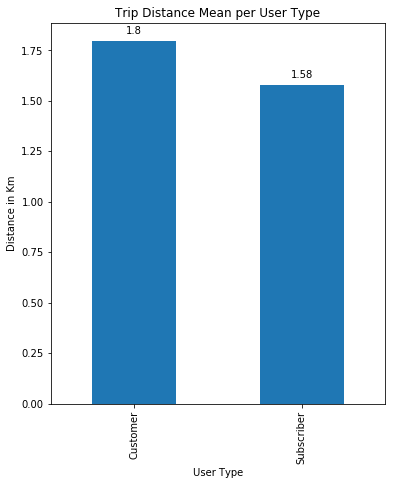

In [147]:
#look at distance travelled customer vs subscribers
base_color = sb.color_palette()[0]

ax= df_clean.groupby('user_type')['distance_km'].mean().plot(kind='bar',figsize=(6,7), color=base_color)
plt.title('Trip Distance Mean per User Type')
plt.ylabel('Distance in Km')
plt.xlabel('User Type')

for p in ax.patches: 
        ax.annotate((np.round(p.get_height(),decimals=2)), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

No, actually it seems that customers and subscribers travel more or less the same distance. A possible assumption that could be made is that customers are more likely to use the bike rides for leisure purposes. 

Does the riding behavior differ within the week between customer and subscriber users?

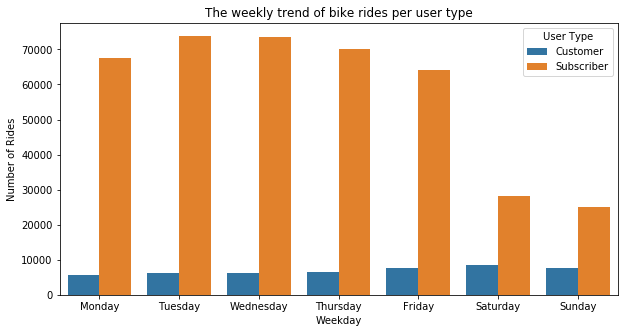

In [28]:
#looking at weekday bike ride trends
plt.figure(figsize=(10,5))
sb.countplot(data= df_clean, x="start_time_weekday",hue="user_type",order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("The weekly trend of bike rides per user type")
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
leg = plt.legend()
leg.set_title('User Type')

The graph above shows that subscribers use their rides much more often during the weekday while customers have more rides during the weekends.

Lets break it down to age group and look at the trend.

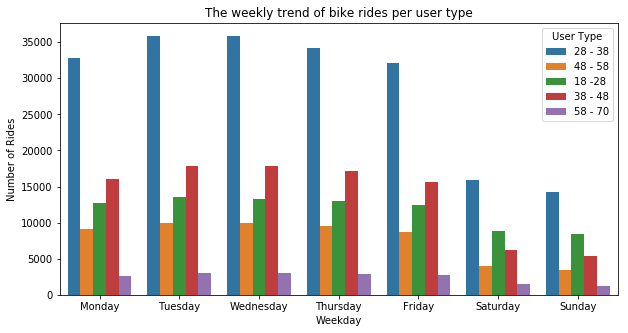

In [30]:
#creating weekly trends per age group
plt.figure(figsize=(10,5))
sb.countplot(data= df_clean, x="start_time_weekday",hue="age_group",order= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("The weekly trend of bike rides per user type")
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
leg = plt.legend()
leg.set_title('User Type')

It shows here that the age group of 28-38 seem to be the ones with the highest rides count. That age group is associated with middle-aged professionals. My theory that most of the middle-aged professionals, mostly consist males, subscribe to the Ford GoBike in order to commute to or from work. 

The last question to be addressed: Do they only commute to work, from work or both?



## Multivariate Exploration

Here I use a heatmap to able to visualize at what time the riders commute the most.
This would give us more of an idea of the behavioral patterns of 28-38 year old the subscibers and perhaps further validate our theory.

In [126]:
#limit the dataset to ages 28-38
endtwenties_earlythirties= df_clean.query('age >= 28.0 & age <= 38.0').copy()


Text(114,0.5,'Hour')

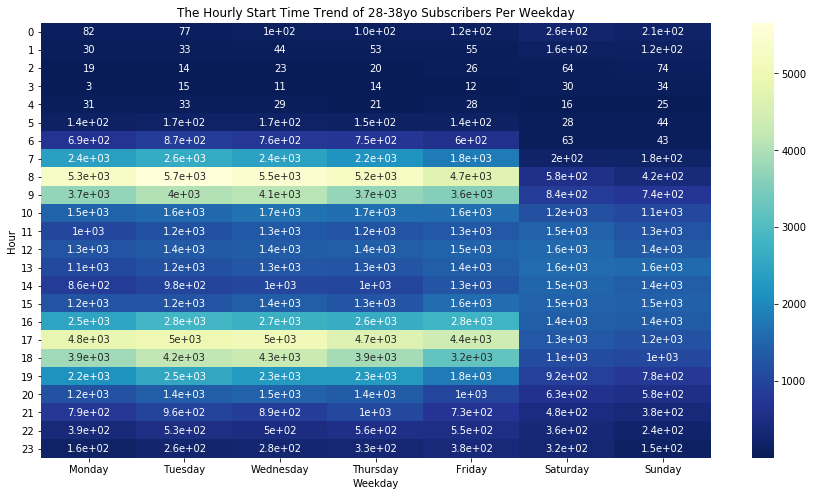

In [127]:
#plotting heatmap of start_hour
plt.figure(figsize=(15,8))
restr_data = endtwenties_earlythirties.groupby(['start_hour', 'start_time_weekday']).count()['bike_id'].unstack()

restr_data = restr_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sb.heatmap(restr_data, cmap='YlGnBu_r',annot=True)
plt.yticks(rotation=360)

plt.title("The Hourly Start Time Trend of 28-38yo Subscribers Per Weekday")
plt.xlabel('Weekday')
plt.ylabel('Hour')



This heatmap shows very clearly that peak start time of bike rides during the week is from 7-9 am and 4-7pm, which is consistent with starting and ending work hours. 

If our exploratory analysis is correct thus far then the end time  heatmap should look very familiar.

Text(114,0.5,'Hour')

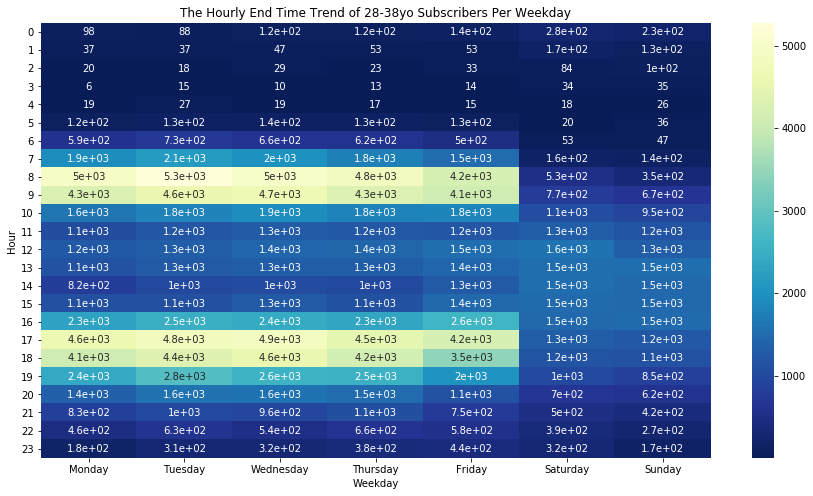

In [128]:
#plotting heatmap of end_time
plt.figure(figsize=(15,8))
restr_data_e =endtwenties_earlythirties.groupby(['end_hour', 'end_time_weekday']).count()['bike_id'].unstack()

restr_data_e = restr_data_e[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sb.heatmap(restr_data_e, cmap='YlGnBu_r',annot=True)
plt.yticks(rotation=360)

plt.title("The Hourly End Time Trend of 28-38yo Subscribers Per Weekday")
plt.xlabel('Weekday')
plt.ylabel('Hour')


It seems that my theory was correct! Most of the riders that consist of subscribers, which are mostly men of age 28-38 that use the bike for commuting to and from work while customers are mostly leisure commuters during the weekend. 

In [130]:
df_clean.to_csv("df_edited.csv")

>